In [281]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import copy

class Graph:
    
    def __init__(self, num_nodes, num_edges=None):
        self.num_nodes = num_nodes
        self.num_edges = num_edges
        
        self.adj_list = [[] for _ in range(num_nodes+1)]
        self.adj_matrix = [[0 for _ in range(num_nodes+1)] for _ in range(num_nodes+1)]
        
        self.adj_matrix_index_modified = False
        self.adj_list_index_modified = False
        

        
    def make_graph_unweighted(self):
        for _ in range(edges):
            x, y = map(int, input().split())
            
            # Scanning adjaceny list
            self.adj_list[x].append(y)
            self.adj_list[y].append(x)
            
            #Scanning adjaceny matrix
            self.adj_matrix[x][y] = 1
            self.adj_matrix[y][x] = 1
        
        # Uncomment the next lines, if you want to remove the starting element from adjaceny list.
        # adj_list.pop(0)
        # self.adj_list_modified = True
        
        # Uncomment the next lines, if you want to remove the starting element from adjaceny matrix.
        # self.adj_matrix = np.delete(self.adj_matrix, 0, 0)
        # self.adj_matrix = np.delete(self.adj_matrix, 0, 1)
        # self.adj_matrix_modified = True
        
    def make_graph_weighted(self, graph=None, index_modified = True):
        self.adj_matrix_index_modified = index_modified
        if graph != None:
            self.adj_matrix = graph
        
        
    def find_minimum_cost_dijkstra(self, node_relaxed, distance, num_nodes):
        min_cost_node_index = None
        min_distance = sys.maxsize
        
        for n in range(num_nodes):
            if distance[n] < min_distance and node_relaxed[n] == False:
                min_distance = distance[n]
                min_cost_node_index = n
 
        return min_cost_node_index
        
    
    def dijkstra(self, start_node):
        graph = copy.deepcopy(self.adj_matrix)
        num_nodes = self.num_nodes
        
        if self.adj_matrix_index_modified == False:
            graph = np.delete(graph, 0, 0)
            graph = np.delete(graph, 0, 1)
            num_nodes -= 1
        
        node_relaxed = [False for _ in range(num_nodes)]
        distance_from_start = [sys.maxsize]*(num_nodes)
        distance_from_start[start_node] = 0
        
        for _ in range(num_nodes):
            next_node = self.find_minimum_cost_dijkstra(node_relaxed, distance_from_start, num_nodes)
            node_relaxed[next_node] = True
            
            for vertex in range(num_nodes):
                if graph[next_node][vertex] > 0 and node_relaxed[vertex] == False:
                    if distance_from_start[vertex] > distance_from_start[next_node] + graph[next_node][vertex]:
                    
                        distance_from_start[vertex] = distance_from_start[next_node] + graph[next_node][vertex]
         
        print("Vertex \tDistance from Source")
        for node in range(num_nodes): 
            print(node+1, "\t", distance_from_start[node]) 
        
        
    def show(self):
        temp = np.array(self.adj_matrix)
        if self.adj_matrix_index_modified == False:
            temp = np.delete(temp, 0, 0)
            temp = np.delete(temp, 0, 1)
        
        G = nx.from_numpy_matrix(temp)
        nx.draw(G, with_labels=True)


In [282]:
nodes = int(input())
edges = int(input())
g1 = Graph(9, edges)
g1.make_graph_weighted(graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0], 
                                [4, 0, 8, 0, 0, 0, 0, 11, 0], 
                                [0, 8, 0, 7, 0, 4, 0, 0, 2], 
                                [0, 0, 7, 0, 9, 14, 0, 0, 0], 
                                [0, 0, 0, 9, 0, 10, 0, 0, 0], 
                                [0, 0, 4, 14, 10, 0, 2, 0, 0], 
                                [0, 0, 0, 0, 0, 2, 0, 1, 6], 
                                [8, 11, 0, 0, 0, 0, 1, 0, 7], 
                                [0, 0, 2, 0, 0, 0, 6, 7, 0]
                               ])

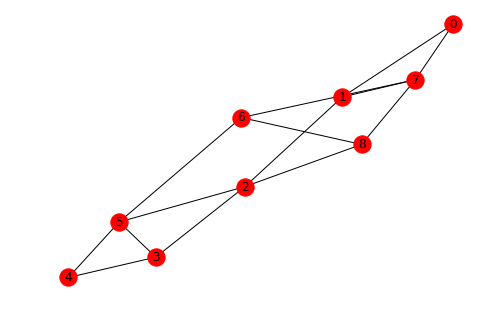

In [283]:
g1.show()

In [284]:
g1.dijkstra(0)

Vertex 	Distance from Source
1 	 0
2 	 4
3 	 12
4 	 19
5 	 21
6 	 11
7 	 9
8 	 8
9 	 14
